<a href="https://colab.research.google.com/github/rizkiar00/K-Nearest-Neighbour/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; 
from google.colab import files
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import math
import operator 
%matplotlib inline
!git clone https://github.com/rizkiar00/K-Nearest-Neighbour

fatal: destination path 'K-Nearest-Neighbour' already exists and is not an empty directory.


In [97]:
data = pd.read_csv('K-Nearest-Neighbour/DataTrain_Tugas3_AI.csv',skipinitialspace=True,usecols = [1,2,3,4,5,6]) #Masukkan Data dan Buat Data Training
scaler = StandardScaler() #Buat Standarisasi Data(Gak Wajib)
scaler.fit(data.drop('Y',axis=1))
scaled_features = scaler.transform(data.drop('Y',axis=1)) #Standarisasi Data
scaled_features

array([[-1.56718539, -0.63126978,  0.3100288 ,  0.74183408,  0.13848686],
       [ 0.00494917, -0.03183679, -1.00939645, -0.44100955, -0.56845289],
       [-0.67046181, -0.24204009,  1.02504804,  0.12291363, -0.47943838],
       ...,
       [ 1.10316536, -1.3170963 , -0.46049094,  0.77378754,  1.27127779],
       [ 0.19114389,  2.77322532, -2.36582892,  0.50094108,  1.06312669],
       [ 0.73275265, -0.3298688 ,  1.44404221,  0.08440413, -0.91688812]])

In [0]:
#datasisa = datatraining.drop(datasample.index) #Buat data yang ada datatraining tapi tidak ada di datasample
#datasisahasil = datasisa.pop('Y') #Pisahin inputan sama output
#datasamplehasil = datasample.pop('Y')
def euclideanDistance(instance1, instance2, length):
	distance = 0
	for x in range(length):
		distance += pow((instance1[x] - instance2[x]), 2)
	return math.sqrt(distance)

def getNeighbors(trainingSet, testInstance, k):
	distances = []
	length = len(testInstance)-1
	for x in range(len(trainingSet)):
		dist = euclideanDistance(testInstance, trainingSet[x], length)
		distances.append((trainingSet[x], dist))
	distances.sort(key=operator.itemgetter(1))
	neighbors = []
	for x in range(k):
		neighbors.append(distances[x][0])
	return neighbors

def getResponse(neighbors):
	classVotes = {}
	for x in range(len(neighbors)):
		response = neighbors[x][-1]
		if response in classVotes:
			classVotes[response] += 1
		else:
			classVotes[response] = 1
	sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
	return sortedVotes[0][0]

def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		testSet[x][-1]
		if testSet[x][-1] == predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

In [0]:
#p = 20 #Berapa kali coba
#q = 40 #Maks K yang dicoba
#avgerror_rate = np.zeros(q-1)
#for j in range (1,p):
  #X_train, X_test, y_train, y_test = train_test_split(scaled_features,data['Y'],test_size=0.80)
  #error_rate = []
  #for i in range(1,q):
    #knn = KNeighborsClassifier(n_neighbors=i,weights = 'distance')#Jumlah tetangga,semakin deket semakin pengaruh
    #knn.fit(X_train,y_train)
    #pred_i = knn.predict(X_test)
    #error_rate.append(np.mean(pred_i != y_test))
  #avgerror_rate = avgerror_rate + error_rate
#avgerror_rate = avgerror_rate/p

In [114]:
predictions=[]
k = 20
X_train, X_test, y_train, y_test = train_test_split(scaled_features,data['Y'],test_size=0.80)
y_train = np.array(y_train)
testSet = np.append(X_train,y_train[:, None],axis=1)
trainingSet = np.append(X_test,y_test[:, None],axis=1)
for y in range(1,k):
  for x in range(len(testSet)):
    neighbors = getNeighbors(trainingSet, testSet[x], y)
    result = getResponse(neighbors)
    predictions.append(result)
  accuracy = getAccuracy(testSet, predictions)
  print('Accuracy: ' + repr(accuracy) + '%')

Accuracy: 86.25%
Accuracy: 86.25%
Accuracy: 86.25%
Accuracy: 86.25%
Accuracy: 86.25%
Accuracy: 86.25%
Accuracy: 86.25%
Accuracy: 86.25%
Accuracy: 86.25%
Accuracy: 86.25%
Accuracy: 86.25%
Accuracy: 86.25%
Accuracy: 86.25%
Accuracy: 86.25%
Accuracy: 86.25%
Accuracy: 86.25%
Accuracy: 86.25%
Accuracy: 86.25%
Accuracy: 86.25%


Text(0,0.5,'Error Rate')

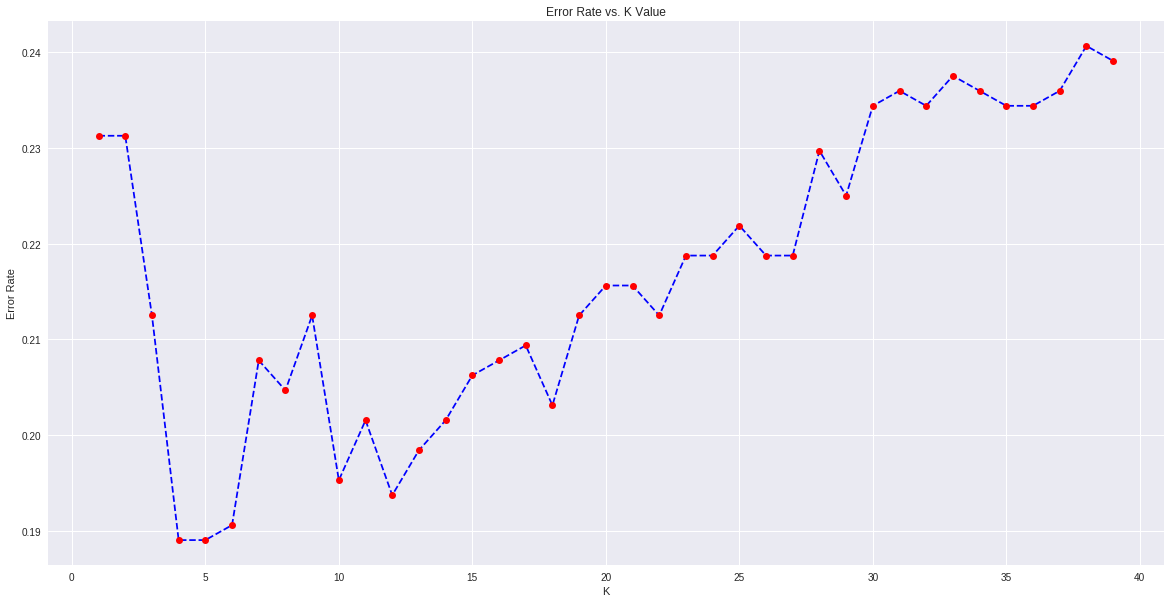

In [0]:
plt.figure(figsize=(20,10))
plt.plot(range(1,q),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=7)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [0]:
datatest = pd.read_csv('K-Nearest-Neighbour/DataTest_Tugas3_AI.csv',skipinitialspace=True)
datatesthasil = datatest.pop('Y')
datatesthasil

0      ?
1      ?
2      ?
3      ?
4      ?
5      ?
6      ?
7      ?
8      ?
9      ?
10     ?
11     ?
12     ?
13     ?
14     ?
15     ?
16     ?
17     ?
18     ?
19     ?
20     ?
21     ?
22     ?
23     ?
24     ?
25     ?
26     ?
27     ?
28     ?
29     ?
      ..
170    ?
171    ?
172    ?
173    ?
174    ?
175    ?
176    ?
177    ?
178    ?
179    ?
180    ?
181    ?
182    ?
183    ?
184    ?
185    ?
186    ?
187    ?
188    ?
189    ?
190    ?
191    ?
192    ?
193    ?
194    ?
195    ?
196    ?
197    ?
198    ?
199    ?
Name: Y, Length: 200, dtype: object